# Figure 2. The impact of different sequences on the prediction results of pathogenic synonymous mutations.

- To be precise, for every sequence length, we run:
    1. DART, filter out features with importance > 0
    2. Param search, for the best mode hyper-parameters based on DART-selected features
    3. 5-fold validation, weigh the feature importance through LightGBM and prediction performance

## 1 DNA

1. Model performance was assessed via mean AUC and AUPR values under optimal hyperparameters
2. The results are collected from `DNA_features/fig_5foldValidation/train8502_DNAfea_21bp_DART_selected_features_importance__allfold_metrics.csv`

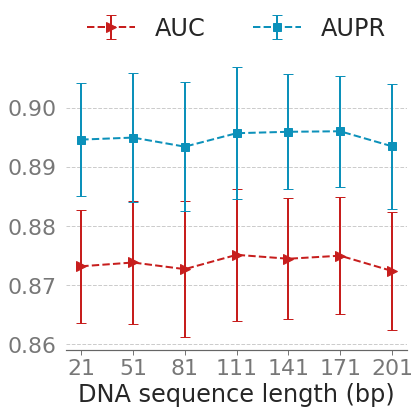

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import seaborn as sns

sns.set(style='whitegrid')
# === 1. Style Setting ===
rcParams.update({
    'font.family': 'DejaVu Sans', 
    'font.size': 12,
    'axes.linewidth': 1.2,
    'lines.linewidth': 2,
    'legend.frameon': False,
    'xtick.direction': 'out',
    'ytick.direction': 'out'
})

# === 2. Data Loading ===
seq_length = ['21bp', '51bp', '81bp', '111bp', '141bp', '171bp', '201bp']
auc_means, auc_stds = [], []
aupr_means, aupr_stds = [], []

for seq in seq_length:
    df = pd.read_csv(
        f"../../DNA_features/fig_5foldValidation/train8502_DNAfea_{seq}_DART_selected_features_importance__allfold_metrics.csv",
        usecols=['auc', 'aupr']
    )
    auc_means.append(df['auc'].mean())
    auc_stds.append(df['auc'].std())
    aupr_means.append(df['aupr'].mean())
    aupr_stds.append(df['aupr'].std())

# === 3. Plot ===
x = np.arange(len(seq_length))
fig, ax = plt.subplots(figsize=(6, 6))

# AUC Curve
ax.errorbar(x, auc_means, yerr=auc_stds, label='AUC',
            fmt='>--', capsize=5, markersize=10, color='#c71e1d')

# AUPR Curve
ax.errorbar(x, aupr_means, yerr=aupr_stds, label='AUPR',
            fmt='s--', capsize=5, markersize=8, color='#0c91ba',)

# === 4. Prettier ===
# x_tick & ticklabels
ax.set_xticks(x)
seq_length_numeric = [item[:-2] for item in seq_length]
ax.set_xticklabels(seq_length_numeric, fontsize=22)

# grid
ax.yaxis.grid(True, color='#ccc', linestyle='--')
ax.xaxis.grid(False)

# border style
for spine in ['top', 'left', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_color('#666')

# tick style
x_tick_param_color = '#777'
ax.tick_params(axis='y', colors=x_tick_param_color, labelsize=22)
ax.tick_params(axis='x', colors=x_tick_param_color, which='both', length=5, width=1, direction='out', bottom=True, top=False, labelsize=22)

# label
ax.set_xlabel('DNA sequence length (bp)', fontsize=24)

# legend
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, 1.2), 
          ncol=2, 
          fontsize=24)

# save & display
plt.tight_layout()
plt.savefig("./Figure2A.png", dpi=300)
plt.show()

## 2 RNA

1. Model performance was assessed via mean AUC and AUPR values under optimal hyperparameters
2. The results are collected from `RNA_features/5foldValidation/reproduce_train8502_RNAfea_81bp_DART_selected_features_importance__allfold_metrics.csv`

[0.6832672641470776, 0.7374486479456491, 0.6871930607812726, 0.6914300041861458, 0.8605793659896722, 0.7527260938685002, 0.704117805678431]
[0.7253890124869982, 0.7761006752727326, 0.7298890853849131, 0.7343205219812613, 0.8513312195025389, 0.7910449441629812, 0.7412049588407601]


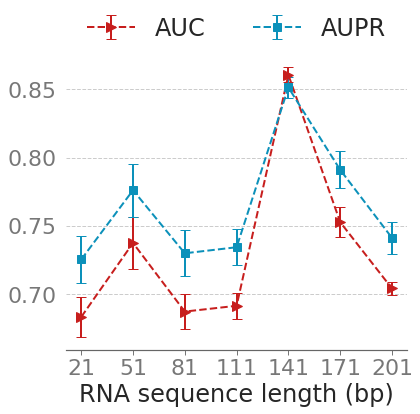

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sns.set(style='whitegrid')
# === 1. Style Setting ===
rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'axes.linewidth': 1.2,
    'lines.linewidth': 2,
    'legend.frameon': False,
    'xtick.direction': 'out',
    'ytick.direction': 'out'
})

# === 2. Data Loading ===
seq_length = ['21bp', '51bp', '81bp', '111bp', '141bp', '171bp', '201bp']
auc_means, auc_stds = [], []
aupr_means, aupr_stds = [], []

for seq in seq_length:
    df = pd.read_csv(
        f"../../RNA_features/5foldValidation/reproduce_train8502_RNAfea_{seq}_DART_selected_features_importance__allfold_metrics.csv",
        usecols=['auc', 'aupr']
    )
    auc_means.append(df['auc'].mean())
    auc_stds.append(df['auc'].std())
    aupr_means.append(df['aupr'].mean())
    aupr_stds.append(df['aupr'].std())

print(auc_means)
print(aupr_means)

# === 3. Plot ===
x = np.arange(len(seq_length))
fig, ax = plt.subplots(figsize=(6, 6))

# AUC Curve
ax.errorbar(x, auc_means, yerr=auc_stds, label='AUC',
            fmt='>--', capsize=5, markersize=10, color='#c71e1d')

# AUPR Curve
ax.errorbar(x, aupr_means, yerr=aupr_stds, label='AUPR',
            fmt='s--', capsize=5, markersize=8, color='#0c91ba',)


# === 4. Prettier ===
# y axis granularity control
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# x_tick & ticklabels
ax.set_xticks(x)
seq_length_numeric = [item[:-2] for item in seq_length]
ax.set_xticklabels(seq_length_numeric, fontsize=22)

# grid
ax.yaxis.grid(True, color='#ccc', linestyle='--')
ax.xaxis.grid(False)

# border style
for spine in ['top', 'left', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_color('#666')

# tick style
x_tick_param_color = '#777'
ax.tick_params(axis='y', colors=x_tick_param_color, labelsize=22)
ax.tick_params(axis='x', colors=x_tick_param_color, which='both', length=5, width=1, direction='out', bottom=True, top=False, labelsize=22)

# label
ax.set_xlabel('RNA sequence length (bp)', fontsize=24)
# ax.set_ylabel('Score', fontsize=13)

# legend
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, 1.2), 
          ncol=2, 
          fontsize=24)

# save & display
plt.tight_layout()
# plt.savefig("./Figure2B.png", dpi=300)
plt.show()

## 3 Protein

1. Model performance was assessed via mean AUC and AUPR values under optimal hyperparameters
2. The results are collected from `Protein_features/5foldValidation_reproduce/train8502_proteinfea_7aa_DART_selected_features_importance__allfold_metrics.csv`

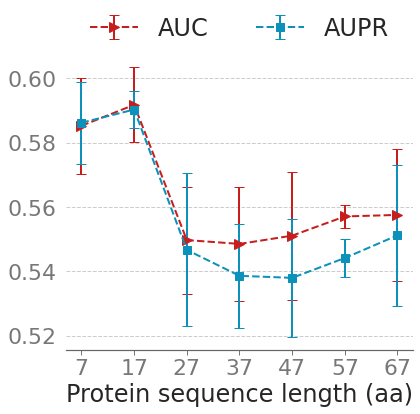

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sns.set(style='whitegrid')
# === 1. Style Setting ===
rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'axes.linewidth': 1.2,
    'lines.linewidth': 2,
    'legend.frameon': False,
    'xtick.direction': 'out',
    'ytick.direction': 'out'
})

# === 2. Data Loading ===
seq_length = ['7aa', '17aa', '27aa', '37aa', '47aa', '57aa', '67aa']
auc_means, auc_stds = [], []
aupr_means, aupr_stds = [], []

for seq in seq_length:
    df = pd.read_csv(
        f"../../Protein_features/5foldValidation_reproduce/train8502_proteinfea_{seq}_DART_selected_features_importance__allfold_metrics.csv",
        usecols=['auc', 'aupr']
    )
    auc_means.append(df['auc'].mean())
    auc_stds.append(df['auc'].std())
    aupr_means.append(df['aupr'].mean())
    aupr_stds.append(df['aupr'].std())

# === 3. Plot ===
x = np.arange(len(seq_length))
fig, ax = plt.subplots(figsize=(6, 6))

# AUC Curve
ax.errorbar(x, auc_means, yerr=auc_stds, label='AUC',
            fmt='>--', capsize=5, markersize=10, color='#c71e1d')

# AUPR Curve
ax.errorbar(x, aupr_means, yerr=aupr_stds, label='AUPR',
            fmt='s--', capsize=5, markersize=8, color='#0c91ba',)


# === 4. Prettier ===
# y axis granularity control
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# x_tick & ticklabels
ax.set_xticks(x)
seq_length_numeric = [item[:-2] for item in seq_length]
ax.set_xticklabels(seq_length_numeric, fontsize=22)

# grid
ax.yaxis.grid(True, color='#ccc', linestyle='--')
ax.xaxis.grid(False)

# border style
for spine in ['top', 'left', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_color('#666')

# tick style
x_tick_param_color = '#777'
ax.tick_params(axis='y', colors=x_tick_param_color, labelsize=22)
ax.tick_params(axis='x', colors=x_tick_param_color, which='both', length=5, width=1, direction='out', bottom=True, top=False, labelsize=22)

# label
ax.set_xlabel('Protein sequence length (aa)', fontsize=24)

# legend
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, 1.2), 
          ncol=2, 
          fontsize=24)

# save & display
plt.tight_layout()
plt.savefig("./Figure2C.png", dpi=300)
plt.show()

# 